In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import timeit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
 #Loading Data set
KDD_Data = pd.read_csv("/content/drive/My Drive/NSL KDD/kddcup.data.corrected")

In [4]:
KDD_Data

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.00,5,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [5]:
KDD_Data.iloc[:,41].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [6]:
KDD_Data.iloc[:,41].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972780
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: normal., dtype: int64

In [7]:
#shape of Data
KDD_Data.shape

(4898430, 42)

In [8]:
#Naming the columns
col=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
  'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
  'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
  'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
  'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
  'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
KDD_Data.columns=col
KDD_Data.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,184,124,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,10,1.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
KDD_Data.shape

(4898430, 42)

In [10]:
#droping unnecessary columns
df = KDD_Data
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.00,5,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [11]:
print(df.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [12]:
from sklearn import preprocessing
#protocol_type
protocol_type = preprocessing.LabelEncoder()
protocol_type.fit(df['protocol_type'])
df['protocol_type']=protocol_type.transform(df['protocol_type'])
#service
service = preprocessing.LabelEncoder()
service.fit(df['service'])
df['service']=service.transform(df['service'])
# flag
service = preprocessing.LabelEncoder()
service.fit(df['flag'])
df['flag']=service.transform(df['flag'])
# target
service = preprocessing.LabelEncoder()
service.fit(df['target'])
df['target']=service.transform(df['target'])

In [13]:
 df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,11
1,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,11
2,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,11
3,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,11
4,0,1,24,9,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,11
5,0,1,24,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,11
6,0,1,24,9,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,11
7,0,1,24,9,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,11
8,0,1,24,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11
9,0,1,24,9,184,124,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,10,1.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,11


In [14]:
 D=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
  'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
  'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
  'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
  'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
  'dst_host_rerror_rate','dst_host_srv_rerror_rate']
X=df[D]
y=df['target']

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#selecting 10 best features
best= SelectKBest(chi2, k=10)
X_new=best.fit_transform(X, y)
X_new.shape

(4898430, 10)

In [16]:
mask = best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, D):
    if bool:
        new_features.append(feature)

In [17]:
new_features

['duration',
 'service',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count']

In [18]:
X_feat=pd.DataFrame(X_new,columns=new_features)
X_feat

,duration,service,src_bytes,dst_bytes,wrong_fragment,hot,count,srv_count,dst_host_count,dst_host_srv_count
0,0.0,24.0,162.0,4528.0,0.0,0.0,2.0,2.0,1.0,1.0
1,0.0,24.0,236.0,1228.0,0.0,0.0,1.0,1.0,2.0,2.0
2,0.0,24.0,233.0,2032.0,0.0,0.0,2.0,2.0,3.0,3.0
3,0.0,24.0,239.0,486.0,0.0,0.0,3.0,3.0,4.0,4.0
4,0.0,24.0,238.0,1282.0,0.0,0.0,4.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
4898425,0.0,24.0,212.0,2288.0,0.0,0.0,3.0,32.0,3.0,255.0
4898426,0.0,24.0,219.0,236.0,0.0,0.0,4.0,33.0,4.0,255.0
4898427,0.0,24.0,218.0,3610.0,0.0,0.0,5.0,34.0,5.0,255.0
4898428,0.0,24.0,219.0,1234.0,0.0,0.0,6.0,35.0,6.0,255.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_feat_scaled=scaler.fit_transform(X_feat)

In [20]:
X_feat_scaled

array([[-6.68331923e-02, -8.88374628e-02, -1.77667973e-03, ...,
        -1.19217837e+00, -3.62352464e+00, -1.77706947e+00],
       [-6.68331923e-02, -8.88374628e-02, -1.69807599e-03, ...,
        -1.19624353e+00, -3.60790473e+00, -1.76762773e+00],
       [-6.68331923e-02, -8.88374628e-02, -1.70126263e-03, ...,
        -1.19217837e+00, -3.59228482e+00, -1.75818599e+00],
       ...,
       [-6.68331923e-02, -8.88374628e-02, -1.71719582e-03, ...,
        -1.06209320e+00, -3.56104499e+00,  6.21131328e-01],
       [-6.68331923e-02, -8.88374628e-02, -1.71613361e-03, ...,
        -1.05802804e+00, -3.54542508e+00,  6.21131328e-01],
       [-6.68331923e-02, -8.88374628e-02, -1.71613361e-03, ...,
        -1.19624353e+00, -3.52980517e+00,  6.21131328e-01]])

In [21]:
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X_feat_scaled, y, test_size=0.2, random_state = ran) 

In [22]:
from keras.layers import LSTM, SimpleRNN, GRU
from __future__ import print_function
# from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [23]:
y_train1 = np.array(y_train)
y_test1 = np.array(y_test)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

X_train = np.array(X_train)
X_test = np.array(X_test)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [25]:
batch_size = 32

# 1. define the network
model = Sequential()
model.add(LSTM(100,input_dim=10))  # try using a GRU instead, for fun
model.add(Dropout(0.01))
# model.add(LSTM(4))  # try using a GRU instead, for fun
# model.add(Dropout(0.01))
model.add(Dense(500))
model.add(Dropout(0.01))
model.add(Dense(23))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, input_shape=(None, 10))`
  """


In [26]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [27]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, nb_epoch=20,callbacks=[monitor])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 3918744 samples, validate on 979686 samples
Epoch 1/20
3918744/3918744 [==============================] - 1166s 298us/step - loss: 0.0295 - accuracy: 0.9919 - val_loss: 0.0239 - val_accuracy: 0.9943
Epoch 2/20
3918744/3918744 [==============================] - 1171s 299us/step - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.0233 - val_accuracy: 0.9948
Epoch 3/20
3918744/3918744 [==============================] - 1169s 298us/step - loss: 0.0232 - accuracy: 0.9940 - val_loss: 0.0195 - val_accuracy: 0.9954
Epoch 4/20
3918744/3918744 [==============================] - 1179s 301us/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.0201 - val_accuracy: 0.9946
Epoch 5/20
3918744/3918744 [==============================] - 1174s 300us/step - loss: 0.0219 - accuracy: 0.9947 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 6/20
3918744/3918744 [==============================] - 1189s 303us/step - loss: 0.0214 - accuracy: 0.9949 - val_loss: 0.0193 - val_accuracy: 0.9961
Epoch 7/20
391874

In [28]:
pred_LSTM=model.predict_classes(X_test)

In [29]:
from sklearn.metrics import classification_report
# target_names = ['0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(service.inverse_transform(y_test1), service.inverse_transform(pred_LSTM)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       0.90      0.97      0.93       481
buffer_overflow.       0.00      0.00      0.00         6
      ftp_write.       0.00      0.00      0.00         3
   guess_passwd.       0.20      0.11      0.14         9
        ipsweep.       0.88      0.97      0.92      2522
           land.       0.00      0.00      0.00         3
     loadmodule.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00    213835
           nmap.       0.00      0.00      0.00       504
         normal.       0.99      0.99      0.99    194371
           perl.       0.00      0.00      0.00         1
            phf.       0.00      0.00      0.00         2
            pod.       0.96      1.00      0.98        45
      portsweep.       0.42      0.61      0.50      2050
        rootkit.       0.00      0.00      0.00         1
          satan.       1.00      0.81      0.89      3199
          smu

In [30]:
pred_LSTM_proba=model.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


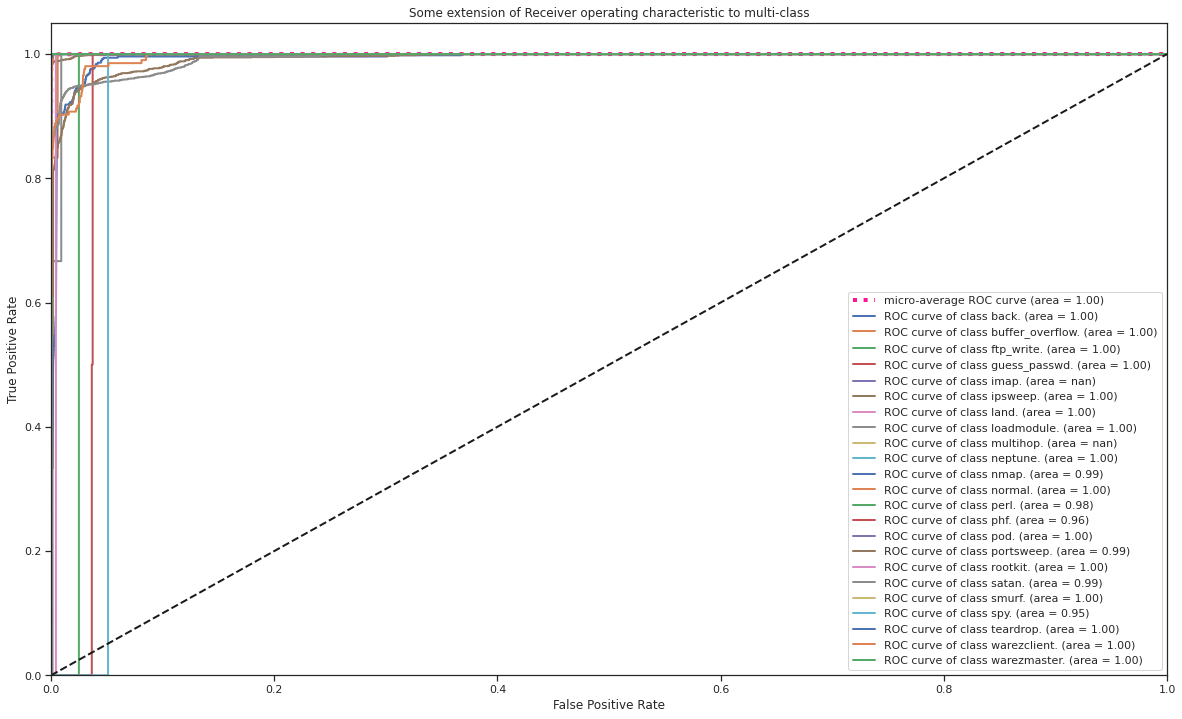

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
lw=2
n_classes=23
y_test=y_test
y_score=pred_LSTM_proba
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(20,12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(str(service.inverse_transform([i])).strip("[']"), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()